In [2]:
import sklearn

In [3]:
sklearn.__version__

'1.5.1'

In [4]:
# http://bit.ly/bream_list
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [5]:
import matplotlib.pyplot as plt

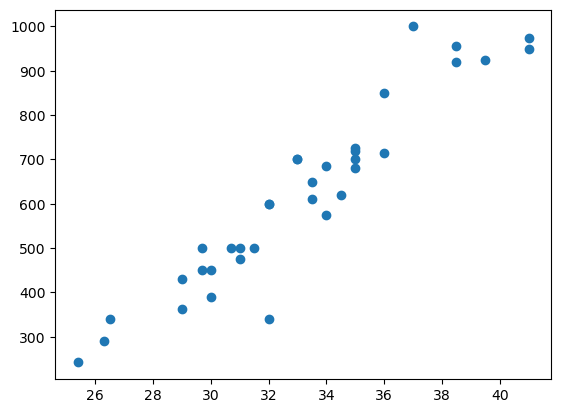

In [6]:
plt.plot(bream_length,bream_weight,'o')

In [7]:
#http://bit.ly/smelt_list
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


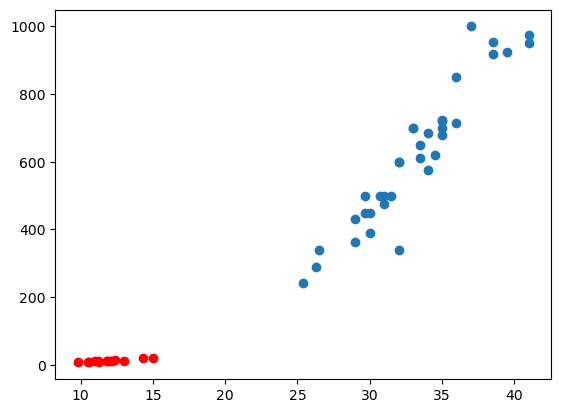

In [10]:
plt.plot(smelt_length,smelt_weight,'or')
plt.plot(bream_length,bream_weight,'o')
plt.show()

In [11]:
length = bream_length+smelt_length
weight = bream_weight+smelt_weight

In [15]:
X=[ [l,w] for l,w in zip(length,weight)]

In [23]:
y=[1]*len(bream_length) +[0]*len(smelt_length)
print(y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [46]:
import numpy as np
np.random.seed(2024)
idx=np.arange(len(X))
np.random.shuffle(idx)
X=np.array(X)
y=np.array(y)
#X=X[idx]
#y=y[idx]

In [63]:
from sklearn.neighbors import KNeighborsClassifier  # 근처에 k개의 값
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#모델 객체 생성
model=KNeighborsClassifier()
#데이터 전처리
ss=StandardScaler()
ss.fit(X)
X=ss.transform(X)
X_train,y_train=X[:35],y[:35]
X_test,y_test=X[35:],y[35:]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2024)
#print(len(X_train),len(X_test),len(y_train),len(y_test))
#학습
model.fit(X_train,y_train)
#평가
model.score(X_test,y_test)

1.0

In [64]:
#예측
model.predict(ss.transform([[25,150]]))

array([1])

In [70]:
ss.transform([[25,150]])[0][0],ss.transform([[25,150]])[0][1]

(-0.20271783836674304, -0.9067744363349075)

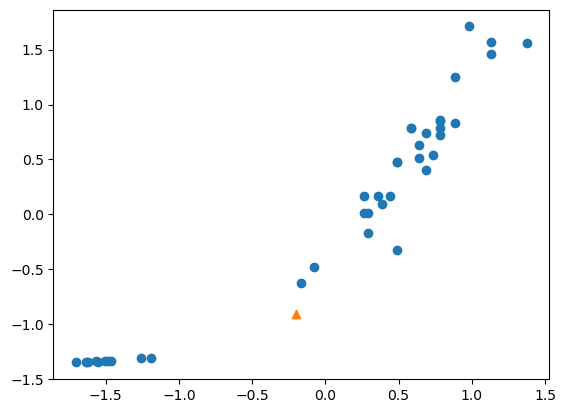

In [72]:
plt.scatter(X_train[:,0],X_train[:,1])
plt.scatter(ss.transform([[25,150]])[0][0],ss.transform([[25,150]])[0][1],marker='^')
#plt.xlim(0,1000)

### Regression

In [85]:
import numpy as np
X=np.array(length)
y=np.array(weight)
print(X,y)


[25.4 26.3 26.5 29.  29.  29.7 29.7 30.  30.  30.7 31.  31.  31.5 32.
 32.  32.  33.  33.  33.5 33.5 34.  34.  34.5 35.  35.  35.  35.  36.
 36.  37.  38.5 38.5 39.5 41.  41.   9.8 10.5 10.6 11.  11.2 11.3 11.8
 11.8 12.  12.2 12.4 13.  14.3 15. ] [ 242.   290.   340.   363.   430.   450.   500.   390.   450.   500.
  475.   500.   500.   340.   600.   600.   700.   700.   610.   650.
  575.   685.   620.   680.   700.   725.   720.   714.   850.  1000.
  920.   955.   925.   975.   950.     6.7    7.5    7.     9.7    9.8
    8.7   10.     9.9    9.8   12.2   13.4   12.2   19.7   19.9]


In [108]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
model=KNeighborsRegressor(n_neighbors=2)
model.fit(X_train,y_train)
print("학습데이터로 평가:",model.score(X_train,y_train))
print("테스트데이터로 평가:",model.score(X_test,y_test))

학습데이터로 평가: 0.9741562187238896
테스트데이터로 평가: 0.8796175633884639


array([[29.7],
       [32. ],
       [36. ],
       [37. ],
       [11. ],
       [41. ],
       [36. ],
       [30.7],
       [26.3],
       [11.8],
       [32. ],
       [31. ],
       [ 9.8],
       [10.5],
       [33. ],
       [35. ],
       [29. ],
       [12.2],
       [34. ],
       [25.4],
       [33. ],
       [34. ],
       [35. ],
       [41. ],
       [32. ],
       [31. ],
       [10.6],
       [34.5],
       [39.5],
       [12.4],
       [33.5],
       [29. ],
       [31.5],
       [15. ],
       [33.5],
       [38.5]])